# Part 1: Import all the necessary Libraries and set Options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('train.csv')

# Part 2: Take a look at the Data and understand it

In [4]:
print(df.shape)
print("-----------------------------------------------------------------------------------")
print(df.info())

(1460, 81)
-----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  H

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Part 3: Cleaning Up the Data

### We can see that there are a few missing values. We will remove any column with more that 10% missing data

In [7]:
#Get the percentage of missing data in all columns
missing_percent = (df.isnull().sum()/len(df.index)).sort_values(ascending=False).head(20)*100

In [8]:
#Get the columns with more that 10% percent of missing data.
missing_percent[missing_percent>10]

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
LotFrontage    17.739726
dtype: float64

In [9]:
#Remove Columns with more than than 10% missing data. Also removing the 'Id' column as it provides no useful information
df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'],axis='columns', inplace=True)

In [10]:
#Checking the columns that have less than 10% data missing
(df.isnull().sum()/len(df.index)).sort_values(ascending=False).head(20)*100

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493
KitchenAbvGr    0.000000
BedroomAbvGr    0.000000
HalfBath        0.000000
FullBath        0.000000
BsmtHalfBath    0.000000
BsmtFullBath    0.000000
KitchenQual     0.000000
dtype: float64

<AxesSubplot:>

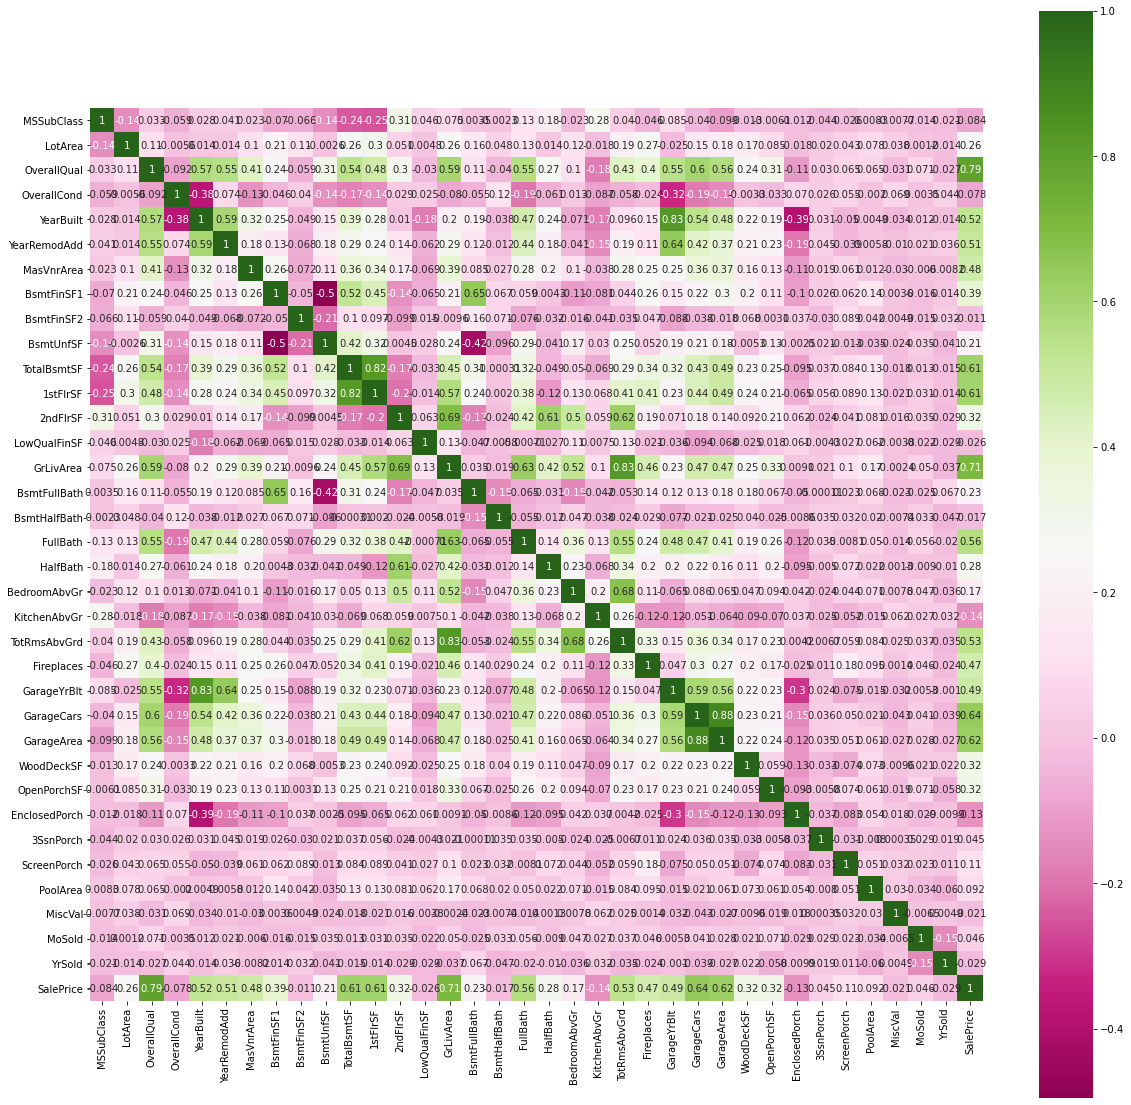

In [11]:
#Plot heat map of variables to check the correlation beteenn Variables and SalePrice
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, square=True, cmap="PiYG")

### We can also see that few variable like (Garage Area and Garage Cars), (Total Basement SF and 1st FLoor SF), (Total Rooms and GLiving Area) are highly correlated. We will keep this in mind while building our model.

### We can see from the correlation heatmap that some variables are positively correlated with SalePrice like OverallQuality, Living Area, Garage Cars and Area, 1st FLoor and 2nd Floor Square Feet. All these make sense as the higher these variables, the higher the Price. These are likely the variable that influence the SalePrice. Lets Plot these highly correlated variables against SalePrice to see their relationship



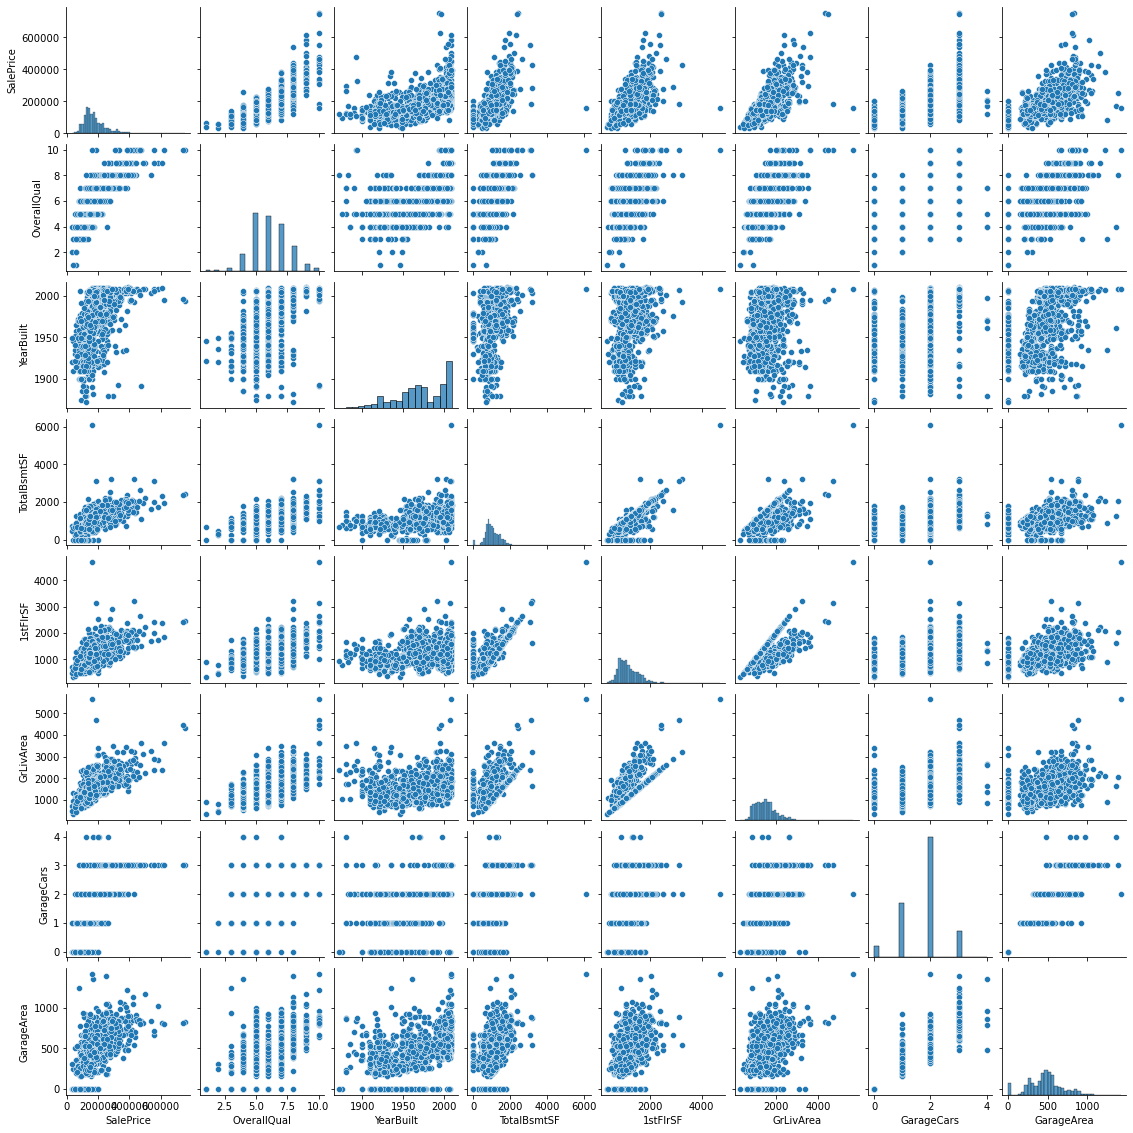

In [12]:
high_corr_var = ['SalePrice', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars','GarageArea']
sns.pairplot(df[high_corr_var],height = 2)
plt.show()

### We can see that most of these have a more or less linear relationship with SalePrice (With Heteroscedacity)

### Now lets see the different values in each column and remove columns that offer very little variance

In [13]:
for column in df.columns:
    print(column)
    print(df[column].value_counts()/len(df[column])*100)
    print("-----------------------------------------------------------------------------------")

MSSubClass
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
-----------------------------------------------------------------------------------
MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
-----------------------------------------------------------------------------------
LotArea
7200     1.712329
9600     1.643836
6000     1.164384
8400     0.958904
9000     0.958904
           ...   
13031    0.068493
10991    0.068493
8944     0.068493
6897     0.068493
8190     0.068493
Name: LotArea, Length: 1073, dtype: float64
-----------------------------------------------------------------------------------
Street
Pave    99.589041
Grvl     0.410959
Name: Stree

0      92.054795
192     0.410959
120     0.342466
224     0.342466
180     0.273973
         ...    
175     0.068493
178     0.068493
40      0.068493
185     0.068493
480     0.068493
Name: ScreenPorch, Length: 76, dtype: float64
-----------------------------------------------------------------------------------
PoolArea
0      99.520548
480     0.068493
512     0.068493
519     0.068493
555     0.068493
576     0.068493
648     0.068493
738     0.068493
Name: PoolArea, dtype: float64
-----------------------------------------------------------------------------------
MiscVal
0        96.438356
400       0.753425
500       0.547945
700       0.342466
450       0.273973
600       0.273973
2000      0.273973
480       0.136986
1200      0.136986
2500      0.068493
350       0.068493
560       0.068493
54        0.068493
620       0.068493
8300      0.068493
800       0.068493
1150      0.068493
15500     0.068493
1300      0.068493
1400      0.068493
3500      0.068493
Name: MiscVal, d

### Going through the above cell, we can see that there are certain variable that do not offer much/any variance. So we will drop them. They are: 
Street, Utilities, LandSlope, Condition2, RoofMatl, Heating, CentralAir, Electrical, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, Functional, GarageCond, PavedDrive, 3SsnPorch, ScreenPorch, PoolArea, MiscVal

### The criteria for choosing these variable is that is any value in these variables comprised of more than 90% of the total.

In [14]:
df.drop(['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl',  'Heating', 'CentralAir', 
         'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 
         'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis='columns', inplace = True)

In [15]:
object_columns = []
continuous_columns = []


for column in df.columns:
    if df.dtypes[column] == 'object':
        object_columns.append(column)
        
for column in df.columns:
    if df.dtypes[column] != 'object':
        continuous_columns.append(column)

#To verify if we missed any columns
# print(len(object_columns) + len(continuous_columns))       

In [16]:
#Fill missing Categorical Values as 'Missing' and missing continuous Variables with the median

for column in object_columns:
    df[column] = df[column].fillna('MISSING')
    
for column in continuous_columns:
    df[column] = df[column].fillna(df[column].median())

In [17]:
#Checking the quantile values to understand the nature of outliers
for column in continuous_columns:
    print(column)
    print(np.min(df[column]), np.quantile(df[column], 0.1), np.quantile(df[column],0.25), np.quantile(df[column], 0.5), np.quantile(df[column], 0.75), np.quantile(df[column], 0.90), np.quantile(df[column], 0.99), np.max(df[column]), sep='\n')
    print("-----------------------------------------------------------------------------------")

MSSubClass
20
20.0
20.0
50.0
70.0
120.0
190.0
190
-----------------------------------------------------------------------------------
LotArea
1300
5000.0
7553.5
9478.5
11601.5
14381.70000000001
37567.64000000021
215245
-----------------------------------------------------------------------------------
OverallQual
1
5.0
5.0
6.0
7.0
8.0
10.0
10
-----------------------------------------------------------------------------------
OverallCond
1
5.0
5.0
5.0
6.0
7.0
9.0
9
-----------------------------------------------------------------------------------
YearBuilt
1872
1924.9
1954.0
1973.0
2000.0
2006.0
2009.0
2010
-----------------------------------------------------------------------------------
YearRemodAdd
1950
1950.0
1967.0
1994.0
2004.0
2006.0
2009.0
2010
-----------------------------------------------------------------------------------
MasVnrArea
0.0
0.0
0.0
0.0
164.25
335.0
791.2800000000007
1600.0
-----------------------------------------------------------------------------------
Bsm

### From the above cell we can see that a few variable have extreme outliers that can skew the analysis. Therefore we need to remove them. I have used IQR method but this method removes nearly half of the data and is not a suitable method.
### The other method I used is Removing outliers by standard deviation. I built models by removing outliers at STD of 3, 4, 5. Removing outliers at 4 STD gave the best results as it removie a huge amount of data and only removes the extreme outliers.

In [18]:
# #Remove Outliers in Continuous Data using the InterQuantileRange Method

# for column in continuous_columns:
#     Q1 = df[column].quantile(.25)
#     Q3 = df[column].quantile(.75)
#     IQR = Q3-Q1
#     df =  df[(df[column] >= (Q1-(1.5*IQR))) & (df[column] <= (Q3+(1.5*IQR)))]

In [19]:
# Removing Outliers in continuous data using Standard Deviation

for column in continuous_columns:
    mean, std = np.mean(df[column]), np.std(df[column])
    cut_off = std * 4
    lower_lim, upper_lim = mean - cut_off, mean + cut_off
    df =  df[(df[column] >= lower_lim) & (df[column] <= upper_lim)]

In [20]:
print(df.shape)
print("-----------------------------------------------------------------------------------")
df.info()

(1367, 56)
-----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 0 to 1457
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1367 non-null   int64  
 1   MSZoning       1367 non-null   object 
 2   LotArea        1367 non-null   int64  
 3   LotShape       1367 non-null   object 
 4   LandContour    1367 non-null   object 
 5   LotConfig      1367 non-null   object 
 6   Neighborhood   1367 non-null   object 
 7   Condition1     1367 non-null   object 
 8   BldgType       1367 non-null   object 
 9   HouseStyle     1367 non-null   object 
 10  OverallQual    1367 non-null   int64  
 11  OverallCond    1367 non-null   int64  
 12  YearBuilt      1367 non-null   int64  
 13  YearRemodAdd   1367 non-null   int64  
 14  RoofStyle      1367 non-null   object 
 15  Exterior1st    1367 non-null   object 
 16  E

In [21]:
dummy_column = pd.get_dummies(df[object_columns], drop_first=True)

df = pd.concat([df, dummy_column], axis='columns')

df.drop(object_columns, axis='columns', inplace=True)

In [22]:
df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,BsmtExposure_Gd,BsmtExposure_MISSING,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_MISSING,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_MISSING,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_MISSING,GarageFinish_MISSING,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_MISSING,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,1710,1,2,1,3,8,0,2003.0,2,548,0,61,0,2,2008,208500,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,1262,0,2,0,3,6,1,1976.0,2,460,298,0,0,5,2007,181500,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,1786,1,2,1,3,6,1,2001.0,2,608,0,42,0,9,2008,223500,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,2198,1,2,1,4,9,1,2000.0,3,836,192,84,0,12,2008,250000,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,50,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,1362,1,1,1,1,5,0,1993.0,2,480,40,30,0,10,2009,143000,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,20,17217,5,5,2006,2006,0.0,0,0,1140,1140,1140,0,1140,0,1,0,3,6,0,1980.0,0,0,36,56,0,7,2006,84500,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1454,20,7500,7,5,2004,2005,0.0,410,0,811,1221,1221,0,1221,1,2,0,2,6,0,2004.0,2,400,0,113,0,10,2009,185000,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1455,60,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,1647,0,2,1,3,7,1,1999.0,2,460,0,40,0,8,2007,175000,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,20,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,2073,1,2,0,3,7,2,1978.0,2,500,349,0,0

# Part 4: Preparing Data for the Model

In [23]:
df_train ,df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=0)

In [24]:
scaler = MinMaxScaler()
df_train[continuous_columns] = scaler.fit_transform(df_train[continuous_columns])
df_test[continuous_columns] = scaler.transform(df_test[continuous_columns])

In [25]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [26]:
len(X_train.columns)

192

### I have built models using all 193 Features and also using as few as 10 in increments of 10. I have observed that theres is no significant increase in model performance after 50 features

In [27]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [28]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_scores[rfe_scores['Status']==True]

,Column_Names,Status,Rank
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,YearBuilt,True,1
7,BsmtFinSF1,True,1
8,BsmtFinSF2,True,1
9,BsmtUnfSF,True,1
10,TotalBsmtSF,True,1
11,1stFlrSF,True,1
12,2ndFlrSF,True,1


In [29]:
rfe_sel_columns = list(rfe_scores[rfe_scores['Status']==True].Column_Names)

In [30]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

# Part 5: Builting the Ridge and Lasso Models and tuning the Hyperparameter

### Building the Lasso Model

In [31]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lasso.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8810773839437998
0.9063915930722986


In [32]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0, lasso.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0, 'Constant')
pd.DataFrame(list(zip(col,model_parameter)))

,0,1
0,MSSubClass,-0.138
1,LotArea,0.035
2,OverallQual,0.296
3,OverallCond,0.044
4,YearBuilt,0.107
5,YearRemodAdd,0.105
6,MasVnrArea,0.000
7,BsmtFinSF1,0.000
8,BsmtFinSF2,0.120
9,BsmtUnfSF,0.221


### We will use the hyperparameter Values 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0, 5.0, 10.0

In [33]:
folds = KFold(n_splits=10, shuffle=True, random_state=0)

hyper_params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0, 5.0, 10.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_params,
                        scoring='r2',
                        cv=folds,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0, 5.0,
                                   10.0]},
             return_train_score=True, scoring='r2')

In [34]:
cv_result_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_lasso['param_alpha'] = cv_result_lasso['param_alpha'].astype('float32')
cv_result_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004987,0.001262,0.002692,0.000897,0.001,{'alpha': 0.001},0.888203,0.864551,0.862733,0.839323,0.870629,0.836324,0.904410,0.855382,0.873044,0.877389,0.867199,0.019679,1,0.876208,0.882586,0.882633,0.883639,0.883546,0.882268,0.879870,0.882386,0.879100,0.882805,0.881504,0.002252
1,0.003790,0.000399,0.002094,0.000299,0.010,{'alpha': 0.01},0.462371,0.532873,0.591521,0.503755,0.597085,0.461616,0.572951,0.499697,0.448853,0.547492,0.521821,0.052170,2,0.514330,0.543827,0.534499,0.536286,0.533924,0.535624,0.522694,0.522656,0.497033,0.546310,0.528718,0.014097
2,0.003790,0.000598,0.002493,0.000805,0.100,{'alpha': 0.1},-0.018610,-0.026063,-0.002424,-0.006351,-0.000006,-0.004929,-0.014107,-0.000457,-0.037209,-0.022105,-0.013226,0.011913,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.004185,0.000747,0.002689,0.001181,0.200,{'alpha': 0.2},-0.018610,-0.026063,-0.002424,-0.006351,-0.000006,-0.004929,-0.014107,-0.000457,-0.037209,-0.022105,-0.013226,0.011913,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003291,0.000457,0.001895,0.000300,0.300,{'alpha': 0.3},-0.018610,-0.026063,-0.002424,-0.006351,-0.000006,-0.004929,-0.014107,-0.000457,-0.037209,-0.022105,-0.013226,0.011913,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


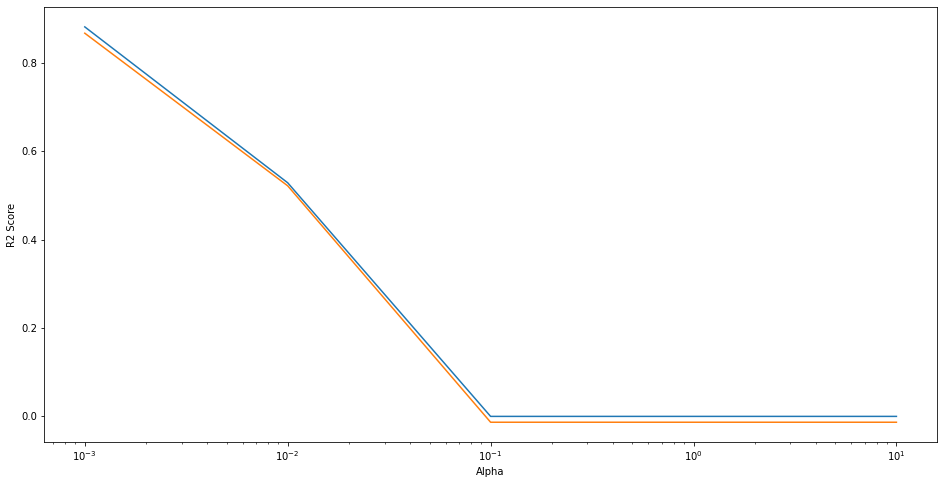

In [35]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [36]:
#Best Alpha Value
model_cv.best_params_

{'alpha': 0.001}

In [37]:
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8810773839437998
0.9063915930722986


In [38]:
#Top 10 Coefficients
model_param = list(model.coef_)
model_param.insert(0,model.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ['Featuere', 'Coef']
lasso_coef.sort_values(by='Coef', ascending=False).head(10)

,Featuere,Coef
2,OverallQual,0.295766
9,BsmtUnfSF,0.221297
10,TotalBsmtSF,0.167978
8,BsmtFinSF2,0.120275
4,YearBuilt,0.106559
5,YearRemodAdd,0.104977
18,TotRmsAbvGrd,0.064861
50,Neighborhood_IDOTRR,0.060030
13,GrLivArea,0.054448
17,BedroomAbvGr,0.047219


### Building the Ridge Model
### We will use the hyperparameter Values 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0, 5.0, 10.0

In [39]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train, y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test, y_test_pred))

0.9127476347244596
0.9078983198658627


In [40]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0, 5.0, 10.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0, 5.0,
                                   10.0]},
             return_train_score=True, scoring='r2')

In [41]:
cv_result_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_ridge['param_alpha'] = cv_result_ridge['param_alpha'].astype('float32')
cv_result_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004289,0.001266,0.002293,0.000456,0.001,{'alpha': 0.001},0.903282,0.929663,0.859249,0.863876,0.884468,0.905643,0.843212,0.925430,0.912485,0.920436,0.894774,0.028812,14,0.913185,0.910152,0.916852,0.916007,0.913540,0.912306,0.917418,0.910344,0.911660,0.910816,0.913228,0.002558
1,0.003790,0.000869,0.002194,0.000870,0.010,{'alpha': 0.01},0.903327,0.929681,0.859260,0.863928,0.884552,0.905726,0.843173,0.925406,0.912490,0.920455,0.894800,0.028815,13,0.913184,0.910151,0.916851,0.916006,0.913539,0.912305,0.917417,0.910343,0.911659,0.910815,0.913227,0.002558
2,0.003890,0.000941,0.002293,0.000639,0.100,{'alpha': 0.1},0.903746,0.929857,0.859355,0.864381,0.885304,0.906495,0.842826,0.925169,0.912513,0.920592,0.895024,0.028844,11,0.913116,0.910082,0.916786,0.915937,0.913517,0.912240,0.917356,0.910276,0.911588,0.910748,0.913165,0.002560
3,0.003889,0.001133,0.002294,0.000457,0.200,{'alpha': 0.2},0.904171,0.930023,0.859433,0.864783,0.885990,0.907230,0.842510,0.924896,0.912494,0.920661,0.895219,0.028866,10,0.912971,0.909934,0.916647,0.915790,0.913460,0.912103,0.917227,0.910133,0.911437,0.910609,0.913031,0.002564
4,0.003590,0.000798,0.002493,0.001022,0.300,{'alpha': 0.3},0.904560,0.930162,0.859484,0.865111,0.886546,0.907865,0.842243,0.924614,0.912445,0.920672,0.895370,0.028882,9,0.912795,0.909754,0.916479,0.915614,0.913377,0.911935,0.917071,0.909961,0.911256,0.910443,0.912869,0.002569


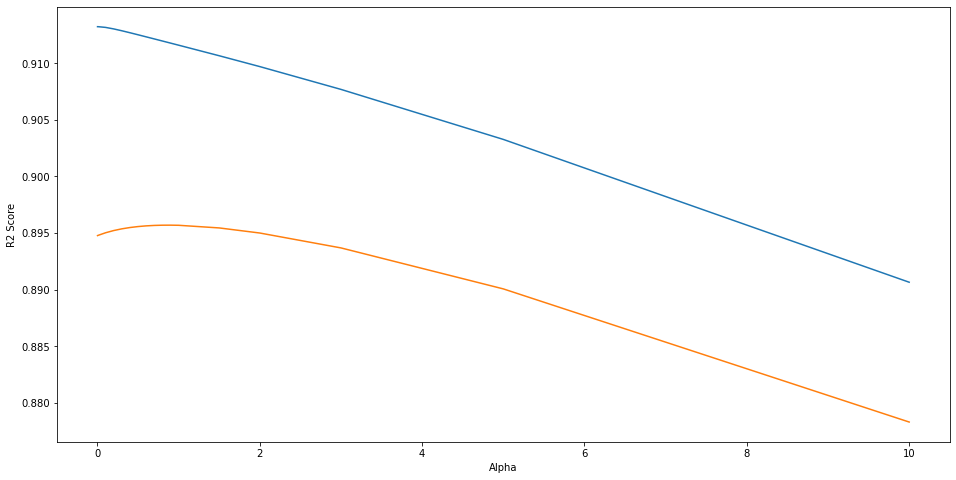

In [42]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_train_score'])
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [43]:
# Best Alpha Value
model_cv.best_params_

{'alpha': 0.9}

In [44]:
ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9114077537103409
0.9137364034852086


In [45]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
2,OverallQual,0.219220
9,BsmtUnfSF,0.214000
10,TotalBsmtSF,0.198565
4,YearBuilt,0.144249
5,YearRemodAdd,0.115711
8,BsmtFinSF2,0.113284
3,OverallCond,0.102597
1,LotArea,0.099136
19,Fireplaces,0.090979
31,MSZoning_RM,0.087262


# Part 6: Conclusions

### From building models, I observed that a hyperparameter value of 0.001 yeilds the best Lasso Model, and a hyperparameter value of 0.9 yields the best Ridge Model

### Best Lasso Model

In [46]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8810773839437998
0.9063915930722986


### 10 Most important Predictor Variables for Lasso Model

In [47]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False)

,Featuere,Coef
2,OverallQual,0.295766
9,BsmtUnfSF,0.221297
10,TotalBsmtSF,0.167978
8,BsmtFinSF2,0.120275
4,YearBuilt,0.106559
5,YearRemodAdd,0.104977
18,TotRmsAbvGrd,0.064861
50,Neighborhood_IDOTRR,0.060030
13,GrLivArea,0.054448
17,BedroomAbvGr,0.047219


### 5 Most Important Predictor Variables for Lasso
OverallQual     0.295766 <br>
BsmtUnfSF	    0.221297 <br>
TotalBsmtSF	    0.167978 <br>
MSSubClass	   -0.138009 <br>
BsmtFinSF2      0.120275 <br>

### Best Ridge Model

In [48]:
ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9114077537103409
0.9137364034852086


### Most important Predictor Variables for Ridge Model

In [49]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False)

,Feaure,Coef
2,OverallQual,0.219220
9,BsmtUnfSF,0.214000
10,TotalBsmtSF,0.198565
4,YearBuilt,0.144249
5,YearRemodAdd,0.115711
8,BsmtFinSF2,0.113284
3,OverallCond,0.102597
1,LotArea,0.099136
19,Fireplaces,0.090979
31,MSZoning_RM,0.087262


### 5 Most Important Predictor Variables for Ridge
OverallQual     0.219220 <br>
BsmtUnfSF	    0.214000 <br>
TotalBsmtSF	    0.198565 <br>
MSSubClass	   -0.144578 <br>
BsmtFinSF2      0.144249 <br>